In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/MYK/Desktop/IRES/scripts')

import numpy as np
import matplotlib.pyplot as plt
import utils as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pick standard profile, say ind0, and take ratio of others against it

In [8]:
profs = np.loadtxt('../J0332_profs.txt')
mjd = np.loadtxt('../J0332_MJD.txt')

standard = profs[0]
#start from [1:] cus we don't need ratio of standard against itself
ratios = np.vstack(tuple(i/standard for i in profs[1:])) 

#because in significance testing, we perform pointwise test against WN, need to make ratios have a zero mean
for i, val in enumerate(ratios):
    ratios[i] = val-val.mean()

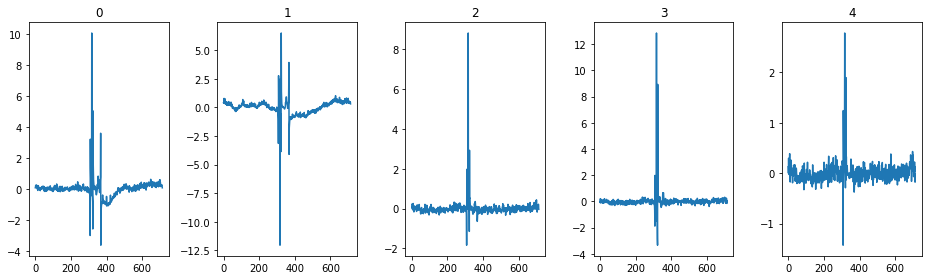

In [9]:
u.gridplot(ratios[:5], 5, hist=False, figsize=(13, 4))

### MJD 58453 is almost identical to null profile! use this to possibly see validity of wavelet test

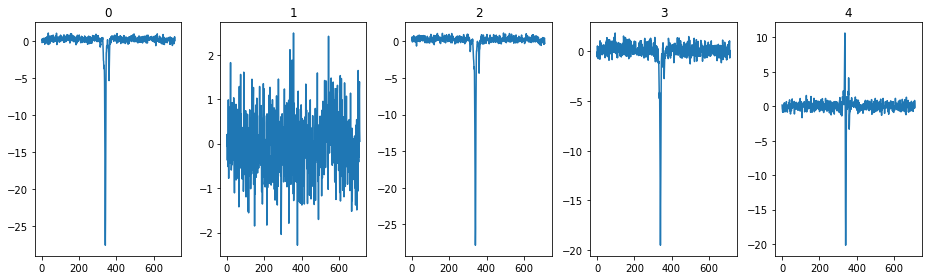

In [10]:
diffs = np.vstack(tuple(i-standard for i in profs[1:])) 

u.gridplot(diffs[40:45], 5, hist=False, figsize=(13, 4))

In [11]:
np.savetxt('../R_wavelet/J0332_ratios.txt', ratios)
np.savetxt('../R_wavelet/J0332_diffs.txt', diffs)

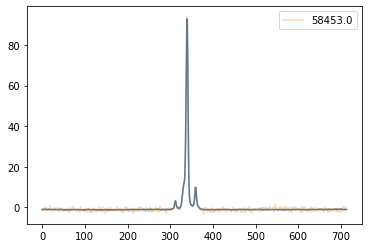

In [15]:
plt.plot(profs[0])
plt.plot(profs[42], label=mjd[42], alpha=.3)
plt.legend()
plt.show()